#POTENTIAL BASED APPROACHABILITY

In [ ]:
import numpy as np

class PotentialBasedAlgorithm:
    def __init__(self, potential_func, learning_rate=0.1):
        self.potential_func = potential_func
        self.learning_rate = learning_rate
        self.weights = None

    def initialize_weights(self, num_features):
        self.weights = np.zeros(num_features)  # Initialize weights to zero

    def update_weights(self, feature_vector, outcome):
        if self.weights is None:
            self.initialize_weights(len(feature_vector))

        feature_vector = np.array(feature_vector)  # Convert to numpy array
        predicted_outcome = np.dot(self.weights, feature_vector)
        loss = self.potential_func(outcome - predicted_outcome)
        gradient = -loss * feature_vector

        self.weights -= self.learning_rate * gradient  # Update weights

    def predict(self, feature_vector):
        if self.weights is None:
            self.initialize_weights(len(feature_vector))

        feature_vector = np.array(feature_vector)  # Convert to numpy array
        return np.dot(self.weights, feature_vector)

def exponential_potential(x):
    return np.exp(-x)

# Example usage
num_features = 2
algorithm = PotentialBasedAlgorithm(potential_func=exponential_potential)

# Simulated online learning
data = [([1, 0], 1), ([-1, 2], -1), ([0, -1], 1)]  # (feature_vector, outcome)

for feature_vector, outcome in data:
    algorithm.update_weights(feature_vector, outcome)

# Predict using learned weights
test_feature_vector = [1, 1]
predicted_outcome = algorithm.predict(test_feature_vector)
print("Predicted Outcome:", predicted_outcome)

Predicted Outcome: 0.27701438378665233


# Potential functions

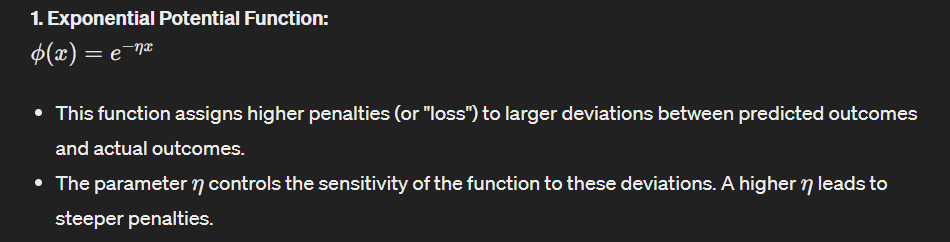

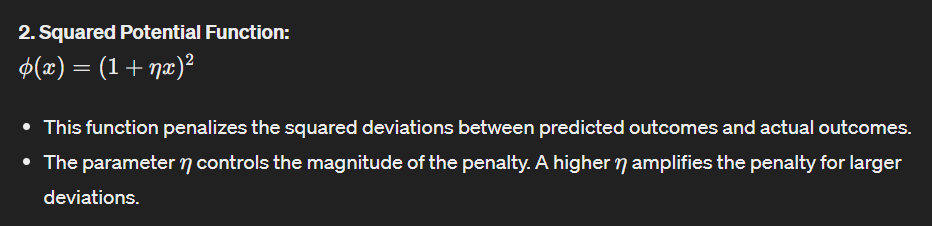

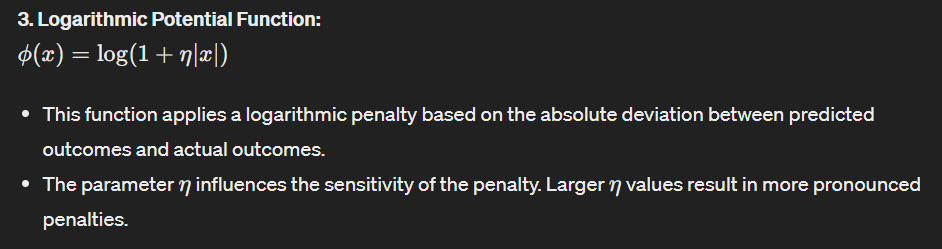

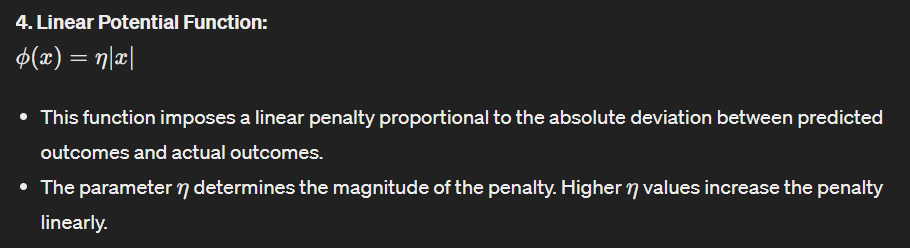

In [ ]:
import numpy as np

# Potential Functions

def exponential_potential(x, eta=1.0):
    """ Exponential potential function """
    return np.exp(-eta * x)

def squared_potential(x, eta=1.0):
    """ Squared potential function """
    return (1 + eta * x)**2

def logarithmic_potential(x, eta=1.0):
    """ Logarithmic potential function """
    return np.log(1 + eta * np.abs(x))

def linear_potential(x, eta=1.0):
    """ Linear potential function """
    return eta * np.abs(x)

# Potential-Based Approachability Algorithm

class PotentialBasedAlgorithm:
    def __init__(self, potential_func, eta=1.0, learning_rate=0.1):
        """
        Initialize the Potential-Based Approachability Algorithm.

        Args:
        - potential_func: The potential function to use.
        - eta: The parameter controlling the sensitivity of the potential function.
        - learning_rate: The learning rate for updating the weights.
        """
        self.potential_func = potential_func
        self.eta = eta
        self.learning_rate = learning_rate
        self.weights = None

    def initialize_weights(self, num_features):
        """ Initialize weights to zero. """
        self.weights = np.zeros(num_features)

    def update_weights(self, feature_vector, outcome):
        """
        Update the weights based on the observed outcome.

        Args:
        - feature_vector: The input feature vector for the current observation.
        - outcome: The true outcome corresponding to the feature vector.
        """
        if self.weights is None:
            self.initialize_weights(len(feature_vector))

        feature_vector = np.array(feature_vector)
        predicted_outcome = np.dot(self.weights, feature_vector)
        loss = self.potential_func(outcome - predicted_outcome, eta=self.eta)
        gradient = -loss * feature_vector

        self.weights -= self.learning_rate * gradient

    def predict(self, feature_vector):
        """
        Predict the outcome for a given feature vector.

        Args:
        - feature_vector: The input feature vector to predict the outcome for.

        Returns:
        - predicted_outcome: The predicted outcome.
        """
        if self.weights is None:
            self.initialize_weights(len(feature_vector))

        feature_vector = np.array(feature_vector)
        return np.dot(self.weights, feature_vector)

# Example Usage of Potential-Based Approachability Algorithm with Different Potential Functions

# Simulated data for online learning (feature vectors and corresponding outcomes)
data = [([1, 0], 1), ([-1, 2], -1), ([0, -1], 1)]

# List of potential functions to test
potential_functions = [exponential_potential, squared_potential, logarithmic_potential, linear_potential]

for potential_func in potential_functions:
    print(f"Testing Potential Function: {potential_func.__name__}")
    print("======================================")

    # Initialize Potential-Based Algorithm with the current potential function
    algorithm = PotentialBasedAlgorithm(potential_func=potential_func, eta=1.0, learning_rate=0.1)

    # Online learning process
    for feature_vector, outcome in data:
        algorithm.update_weights(feature_vector, outcome)

    # Predict using learned weights for a test feature vector
    test_feature_vector = [1, 1]
    predicted_outcome = algorithm.predict(test_feature_vector)
    print("Predicted Outcome:", predicted_outcome)
    print("\n")

Testing Potential Function: exponential_potential
Predicted Outcome: 0.27701438378665233


Testing Potential Function: squared_potential
Predicted Outcome: 0.003097599999999978


Testing Potential Function: logarithmic_potential
Predicted Outcome: 0.05941610449521818


Testing Potential Function: linear_potential
Predicted Outcome: 0.07200000000000002




# Potential based approachability

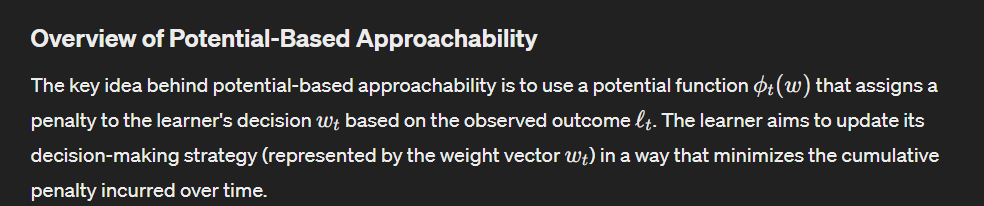

In [ ]:
import numpy as np

class PotentialBasedApproachability:
    def __init__(self, learning_rate=0.1):
        self.learning_rate = learning_rate
        self.weights = None

    def initialize_weights(self, num_features):
        self.weights = np.zeros(num_features)

    def update_weights(self, feature_vector, outcome):
        if self.weights is None:
            self.initialize_weights(len(feature_vector))

        feature_vector = np.array(feature_vector)  # Convert feature_vector to numpy array
        predicted_outcome = np.dot(self.weights, feature_vector)
        loss = outcome - predicted_outcome
        self.weights += self.learning_rate * loss * feature_vector

    def predict(self, feature_vector):
        if self.weights is None:
            self.initialize_weights(len(feature_vector))

        feature_vector = np.array(feature_vector)  # Convert feature_vector to numpy array
        return np.dot(self.weights, feature_vector)

# Example Usage
# Simulated data for online learning
data = [([1, 0], 1), ([-1, 2], -1), ([0, -1], 1)]

# Initialize Potential-Based Approachability Algorithm
algorithm = PotentialBasedApproachability(learning_rate=0.1)

# Online learning process
for feature_vector, outcome in data:
    algorithm.update_weights(feature_vector, outcome)

# Predict using learned weights for a new feature vector
test_feature_vector = [1, 1]
predicted_outcome = algorithm.predict(test_feature_vector)
print("Predicted Outcome:", predicted_outcome)

Predicted Outcome: -0.07200000000000001


# Application to regret minimization

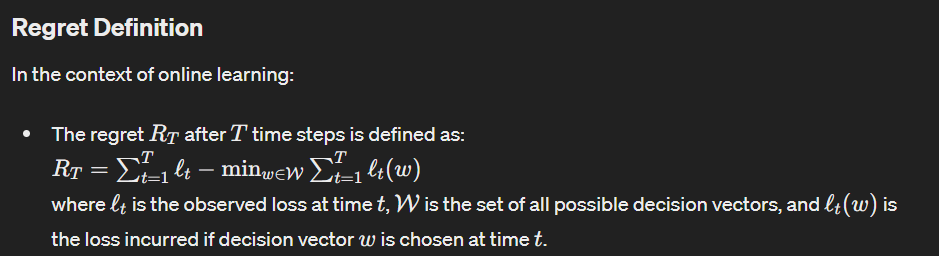

In [ ]:
import numpy as np

class PotentialBasedApproachability:
    def __init__(self, potential_func, eta=1.0, learning_rate=0.1):
        self.potential_func = potential_func
        self.eta = eta
        self.learning_rate = learning_rate
        self.weights = None
        self.regret = 0.0

    def initialize_weights(self, num_features):
        self.weights = np.zeros(num_features)

    def update_weights(self, feature_vector, outcome):
        if self.weights is None:
            self.initialize_weights(len(feature_vector))

        feature_vector = np.array(feature_vector)  # Convert feature_vector to numpy array
        predicted_outcome = np.dot(self.weights, feature_vector)
        loss = outcome - predicted_outcome
        self.weights += self.learning_rate * loss * feature_vector

        # Update regret
        self.regret += loss

    def predict(self, feature_vector):
        if self.weights is None:
            self.initialize_weights(len(feature_vector))

        feature_vector = np.array(feature_vector)  # Convert feature_vector to numpy array
        return np.dot(self.weights, feature_vector)

# Example Usage
# Simulated data for online learning
data = [([1, 0], 1), ([-1, 2], -1), ([0, -1], 1)]

# Initialize Potential-Based Approachability Algorithm with Exponential Potential Function
algorithm = PotentialBasedApproachability(potential_func=exponential_potential, eta=1.0, learning_rate=0.1)

# Online learning process with regret computation
cumulative_loss = 0.0
optimal_loss = float('inf')

for feature_vector, outcome in data:
    algorithm.update_weights(feature_vector, outcome)

    # Compute cumulative loss and optimal loss in hindsight
    cumulative_loss += outcome
    current_loss = cumulative_loss - algorithm.regret
    optimal_loss = min(optimal_loss, current_loss)

# Calculate regret after all data points
regret = cumulative_loss - optimal_loss
print("Total Regret:", regret)

Total Regret: 1.1
